<a href="https://colab.research.google.com/github/Ashwin1999/COVID-19-Data-Mining/blob/nivethsaran/COVID_19_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


import dataset from this link: https://github.com/Ashwin1999/COVID-19-Data-Mining

In [14]:
files = [
         'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/Arnab/COVID-DataTimeSeries(India)/complete.csv',
         'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/Arnab/COVID-DataTimeSeries(India)/district_level_latest.csv',
         'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/Arnab/COVID-DataTimeSeries(India)/nation_level_daily.csv',
         'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/Arnab/COVID-DataTimeSeries(India)/patients_data.csv',
         'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/Arnab/COVID-DataTimeSeries(India)/state_level_daily.csv',
         'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/Arnab/COVID-DataTimeSeries(India)/state_level_latest.csv',
         'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/Arnab/COVID-DataTimeSeries(India)/tests_day_wise.csv',
         'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/Arnab/COVID-DataTimeSeries(India)/tests_state_wise.csv',
]

In [15]:
complete =pd.read_csv(files[0])
complete.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0


In [76]:
complete['Death'] = complete['Death'].str.extract('(\d+)', expand=False)
complete['Death'] = complete['Death'].astype(int)
complete.dtypes

Date                         datetime64[ns]
StateOrUT                            object
Latitude                            float64
Longitude                           float64
Total Confirmed cases               float64
Death                                 int64
Cured/Discharged/Migrated           float64
New cases                             int64
New deaths                            int64
New recovered                         int64
dtype: object

In [16]:
complete['Date']=pd.to_datetime(complete['Date'])
complete.rename(columns={'Name of State / UT':'StateOrUT'},inplace=True)

In [17]:
complete.groupby('StateOrUT').max()['Date']

StateOrUT
Andaman and Nicobar Islands                2020-08-06
Andhra Pradesh                             2020-08-06
Arunachal Pradesh                          2020-08-06
Assam                                      2020-08-06
Bihar                                      2020-08-06
Chandigarh                                 2020-08-06
Chhattisgarh                               2020-08-06
Dadra and Nagar Haveli and Daman and Diu   2020-08-06
Delhi                                      2020-08-06
Goa                                        2020-08-06
Gujarat                                    2020-08-06
Haryana                                    2020-08-06
Himachal Pradesh                           2020-08-06
Jammu and Kashmir                          2020-08-06
Jharkhand                                  2020-08-06
Karnataka                                  2020-08-06
Kerala                                     2020-08-06
Ladakh                                     2020-08-06
Madhya Pradesh    

In [18]:
complete.groupby('StateOrUT').min()['Date']

StateOrUT
Andaman and Nicobar Islands                2020-03-26
Andhra Pradesh                             2020-03-12
Arunachal Pradesh                          2020-04-03
Assam                                      2020-04-01
Bihar                                      2020-03-22
Chandigarh                                 2020-03-21
Chhattisgarh                               2020-03-19
Dadra and Nagar Haveli and Daman and Diu   2020-05-06
Delhi                                      2020-03-02
Goa                                        2020-03-26
Gujarat                                    2020-03-20
Haryana                                    2020-03-04
Himachal Pradesh                           2020-03-21
Jammu and Kashmir                          2020-03-21
Jharkhand                                  2020-04-01
Karnataka                                  2020-03-09
Kerala                                     2020-01-30
Ladakh                                     2020-03-21
Madhya Pradesh    

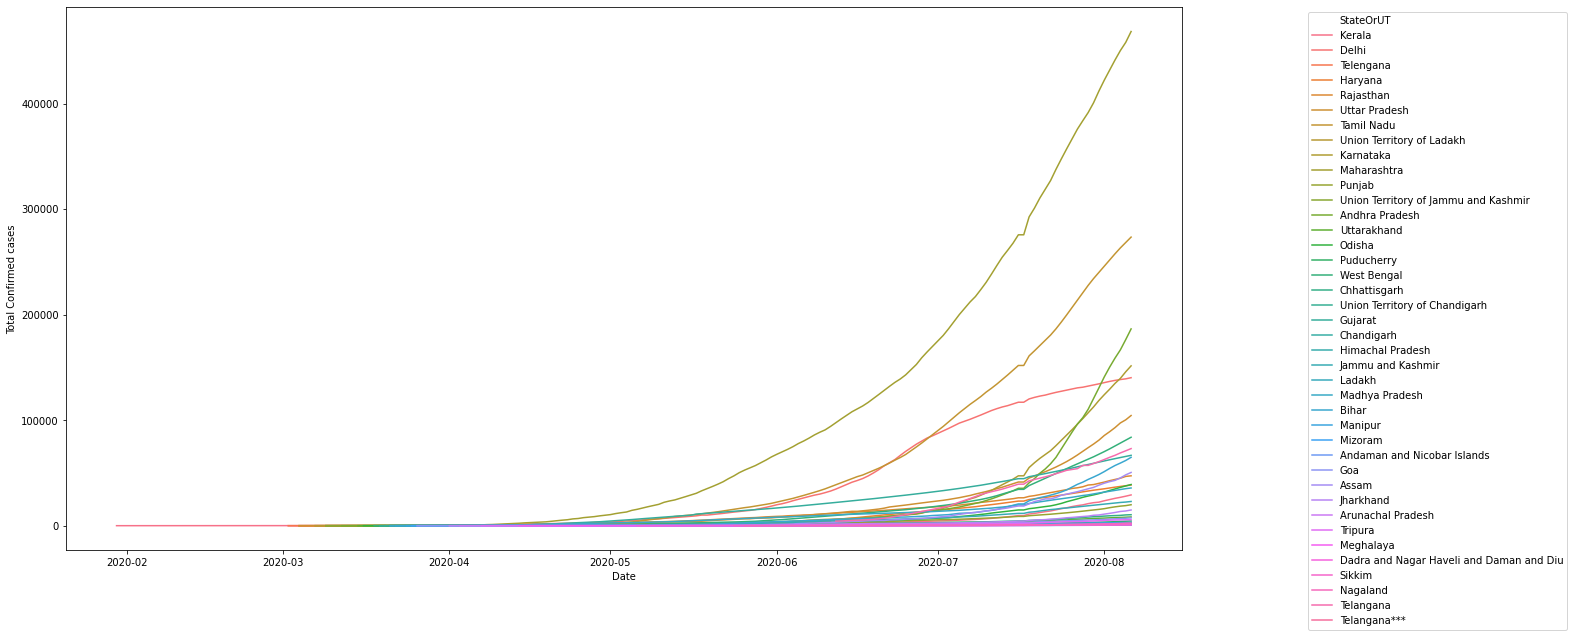

In [62]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Date',y='Total Confirmed cases',data=complete,hue='StateOrUT',units=10,estimator=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1))
plt.show()

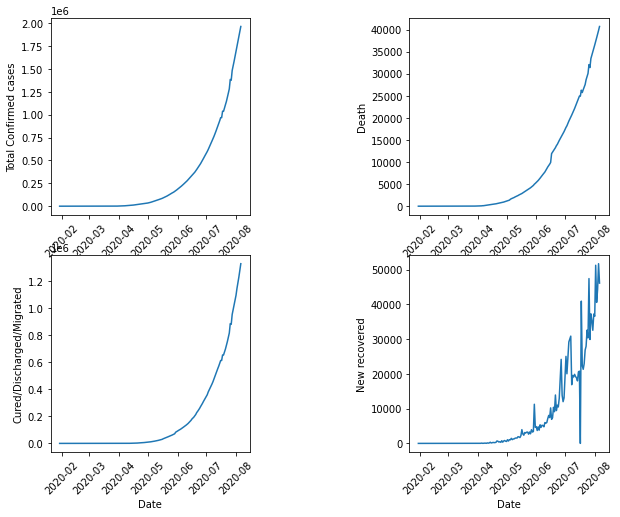

In [84]:
totalline=complete.groupby('Date').sum()
totalline.reset_index(inplace=True)
totalline.head()


fig,ax=plt.subplots(2,2,figsize=(10,8))
plt.subplots_adjust(wspace=0.8)
sns.lineplot(y='Total Confirmed cases',x='Date',data=totalline,ax=ax[0,0])
sns.lineplot(y='Death',x='Date',data=totalline,ax=ax[0,1])
sns.lineplot(y='Cured/Discharged/Migrated',x='Date',data=totalline,ax=ax[1,0])
sns.lineplot(y='New recovered',x='Date',data=totalline,ax=ax[1,1])

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)


In [ ]:
df.group

In [39]:
districtlevel=pd.read_csv(files[1])
districtlevel.head()

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
0,0,UN,State Unassigned,UN_Unassigned,Unassigned,0,0,0,0,0,0,0,0,0,NaN,NaN
1,1,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
2,2,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
3,3,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,51,19,32,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
4,0,AP,Andhra Pradesh,AP_Foreign Evacuees,Foreign Evacuees,434,0,434,0,0,0,0,0,0,NaN,NaN


In [ ]:
districtlevel.drop(['District_Notes','Last_Updated'],axis=1,inplace=True)

In [54]:
districtlevel=districtlevel[districtlevel['District']!='Unassigned']
districtlevel=districtlevel[districtlevel['District']!='Unknown']
districtlevel=districtlevel[districtlevel['State']!='Unknown']

In [55]:
districtlevel['State'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Delhi',
       'Dadra and Nagar Haveli and Daman and Diu', 'Goa', 'Gujarat',
       'Himachal Pradesh', 'Haryana', 'Jharkhand', 'Jammu and Kashmir',
       'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Maharashtra',
       'Meghalaya', 'Manipur', 'Madhya Pradesh', 'Mizoram', 'Nagaland',
       'Odisha', 'Punjab', 'Puducherry', 'Rajasthan', 'Sikkim',
       'Telangana', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

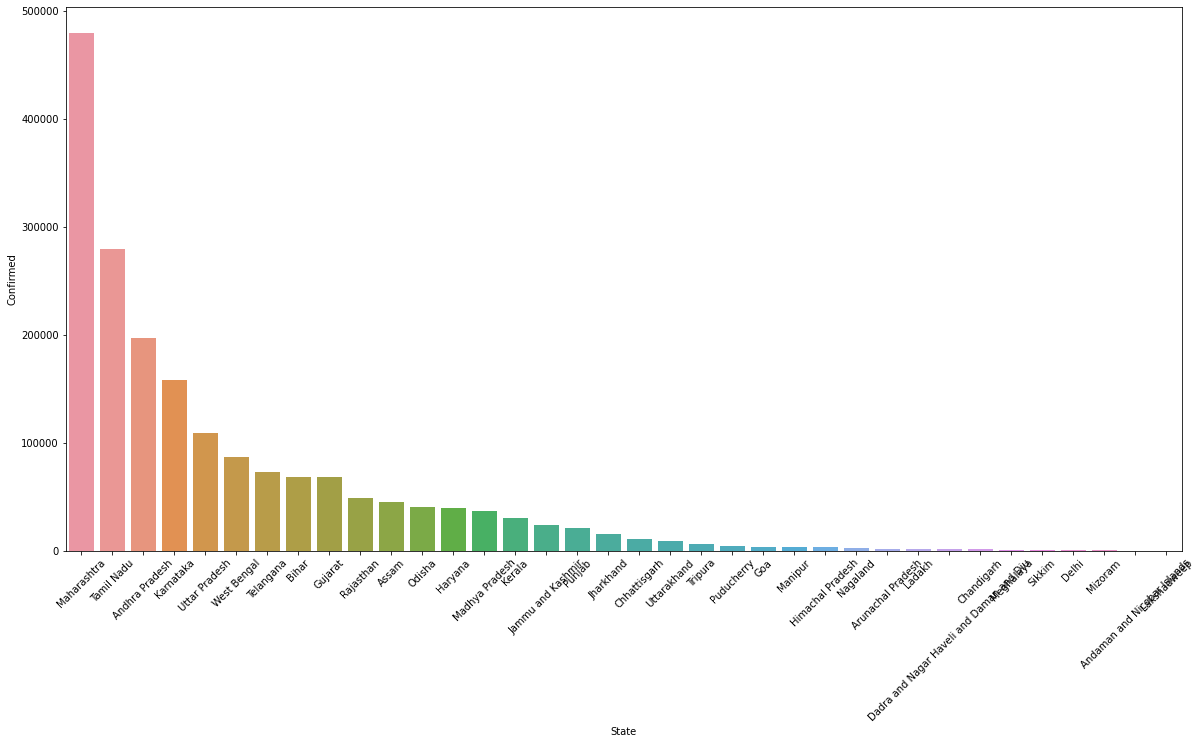

In [56]:
plt.figure(figsize=(20,10))
stateforbar=districtlevel.groupby('State').sum().sort_values('Confirmed',ascending=False)
stateforbar.reset_index(inplace=True)
sns.barplot(x='State',y='Confirmed',data=stateforbar)
plt.xticks(rotation=45)
plt.show()

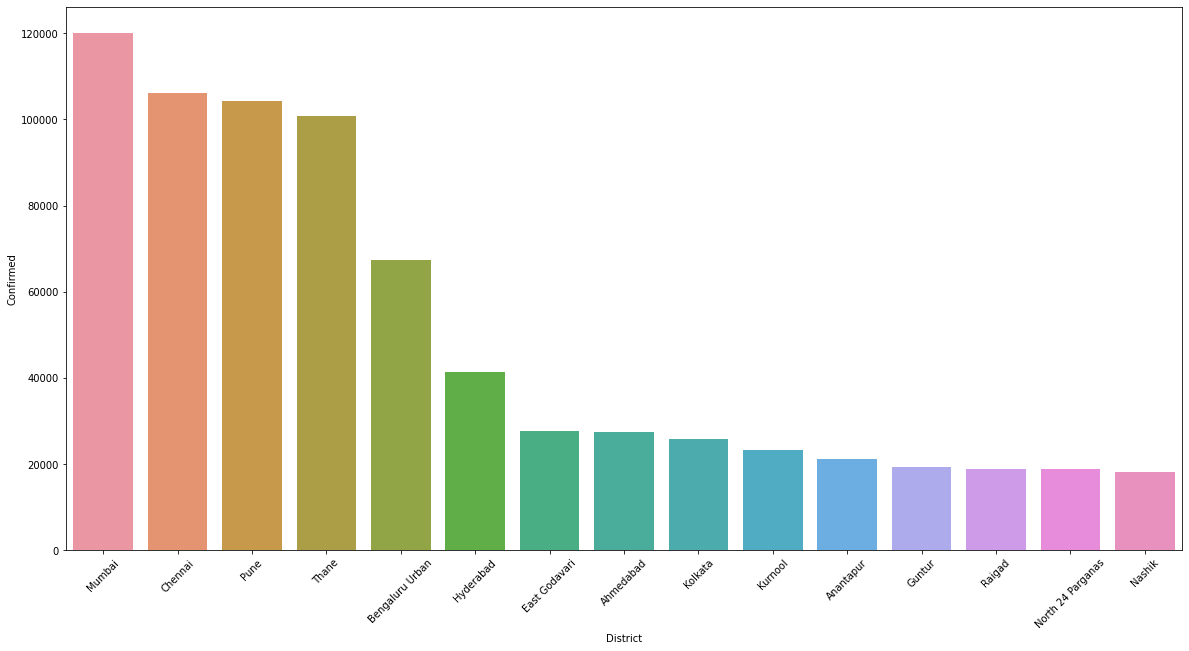

In [57]:
plt.figure(figsize=(20,10))
districtforbar=districtlevel.groupby('District').sum().sort_values('Confirmed',ascending=False)
districtforbar.reset_index(inplace=True)
sns.barplot(x='District',y='Confirmed',data=districtforbar.iloc[0:15,:])
plt.xticks(rotation=45)
plt.show()